In [63]:
import pandas as pd 
import numpy as np 
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import trange
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
import math
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
SEED = 40

In [7]:
np.random.seed(seed=SEED)

In [ ]:
class Net (nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(367, 64)  # 6*6 from image dimension
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
        nn.Linear(in_features, 128),
        nn.BatchNorm1d(128)
        nn.LeakyReLU(0.1),
        nn.Linear(128,1),
        nn.Sigmoid(),)
        
    def forward(self, x):
        return self.disc(x)

class Generator(nn.Module):

    def __init__(self, z_dim, in_features):
        super().__init__()
        self.gen = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.BatchNorm1d(128)
        nn.LeakyReLU(0.1),
        nn.Linear(256,in_features),
        nn.Tanh(),) #because we will normalize imputs. 
    def forward(self, x):
        return self.gen(x)



In [49]:
#ground truth
clusters = pd.read_csv('dataset_5000samples/clusters.txt', sep='\t')

meth = pd.read_csv('dataset_5000samples/meth.txt', sep='\t' ).T
meth.columns = meth.loc['probe',:]
meth = meth.drop('probe')

mRNA = pd.read_csv('dataset_5000samples/mRNA.txt', sep='\t').T
mRNA.columns = mRNA.loc['probe',:]
mRNA = mRNA.drop('probe')

prot = pd.read_csv('dataset_5000samples/prot.txt', sep='\t').T
prot.columns = prot.loc['probe',:]
prot = prot.drop('probe')

In [12]:
X = np.array(meth.values,dtype=np.float32)
Y = np.array(clusters['cluster.id'].apply(lambda x: x-1).values,dtype=np.float32)

X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=SEED, stratify = Y)


In [13]:
#training
model = Net()
BS = 64
loss_function = nn.CrossEntropyLoss(reduction='none')
optim = torch.optim.SGD(model.parameters(),lr = 0.01, momentum=0.2)
losses, accuracies = [], []
t = trange(500)
for i in t: 
    samp = np.random.randint(0,X_train.shape[0],size = (BS), )
    X = torch.tensor(torch.from_numpy(X_train[samp]).reshape(-1,367))
    Y = torch.tensor(torch.from_numpy(Y_train[samp])).long()
    model.zero_grad()
    out = model(X)
    cat = torch.argmax(out, dim = 1)
    acc = (cat==Y).float().mean()
    loss = loss_function(out,Y).mean()
    loss.backward()
    optim.step()
    loss,accuracy = loss.item(),acc.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description("loss %.2f accuracy %.2f" %(loss,accuracy))
plt.ylim(-0.1,2)
plt.plot(losses)
plt.plot(accuracies)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [9]:
y_pred = torch.argmax(model(torch.from_numpy(X_test)), dim = 1).detach().numpy()
accuracy_score(y_test, y_pred)

1.0

In [139]:
X = np.array(meth.values,dtype=np.float32)
Y = np.array(clusters['cluster.id'].apply(lambda x: x-1).values,dtype=np.float32)

X_train = X[Y==1]
Y_train =Y[Y==1]

3.0

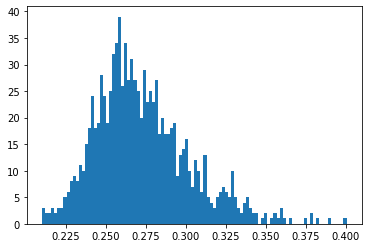

In [78]:
from scipy.stats import skew
plt.hist(np.mean(X_train,axis=1), bins=100)[0][0]


In [79]:
skew(np.mean(X_train,axis=1))

0.8108490705490112

In [137]:
'''mean = (X_train).mean()
stdev = math.sqrt(X_train.var())
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)'''

lossD 0.55 lossG 0.56:   0%|          | 0/500 [00:00<?, ?it/s]

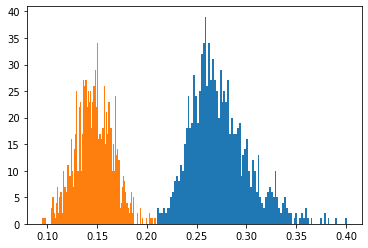

lossD 0.53 lossG 0.97:   4%|▍         | 20/500 [00:15<05:54,  1.35it/s]

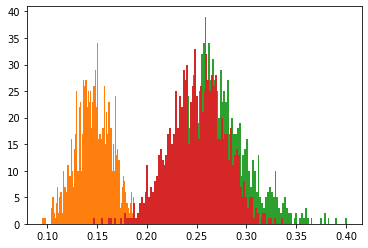

lossD 0.58 lossG 0.85:   8%|▊         | 40/500 [00:37<08:36,  1.12s/it]

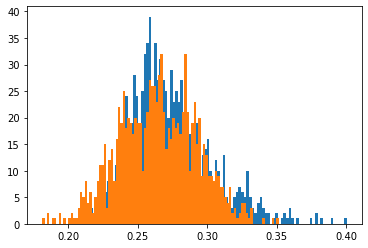

lossD 0.63 lossG 0.74:  12%|█▏        | 60/500 [01:02<07:01,  1.04it/s]

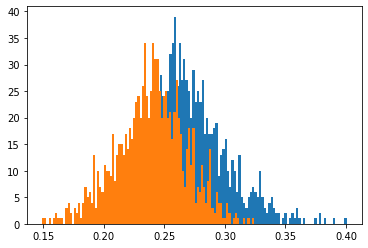

lossD 0.64 lossG 0.71:  16%|█▌        | 80/500 [01:23<06:33,  1.07it/s]

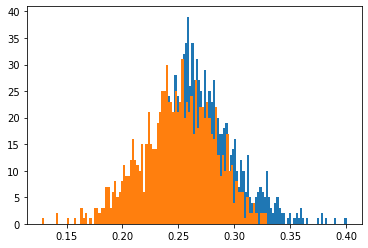

lossD 0.61 lossG 0.76:  20%|██        | 100/500 [01:46<06:58,  1.05s/it]

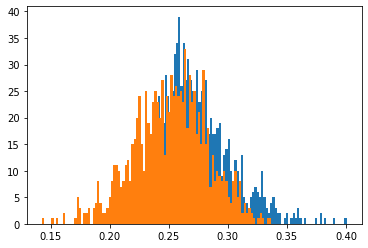

lossD 0.57 lossG 0.78:  24%|██▍       | 120/500 [02:11<07:12,  1.14s/it]

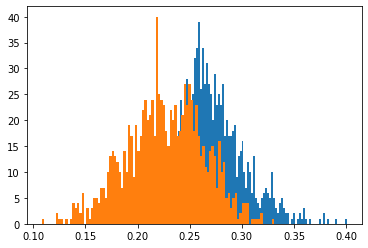

lossD 0.60 lossG 1.02:  28%|██▊       | 140/500 [02:43<07:50,  1.31s/it]

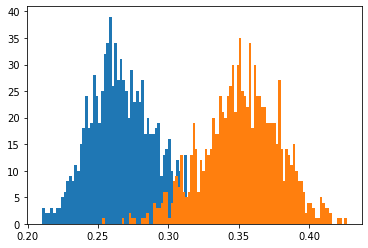

lossD 0.70 lossG 0.76:  32%|███▏      | 160/500 [03:14<08:52,  1.57s/it]

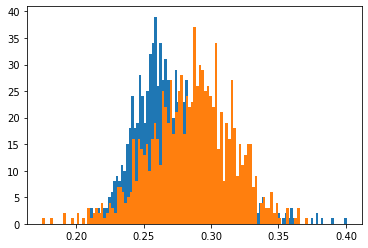

lossD 0.67 lossG 0.78:  36%|███▌      | 180/500 [03:44<07:10,  1.35s/it]

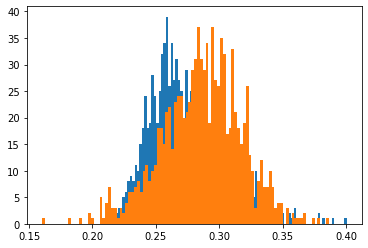

lossD 0.69 lossG 0.74:  40%|████      | 200/500 [04:17<07:05,  1.42s/it]

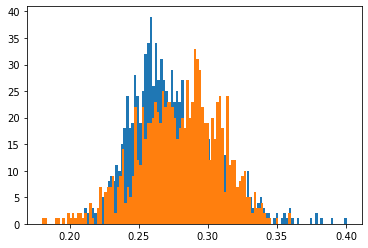

lossD 0.73 lossG 0.73:  44%|████▍     | 220/500 [04:55<06:59,  1.50s/it]

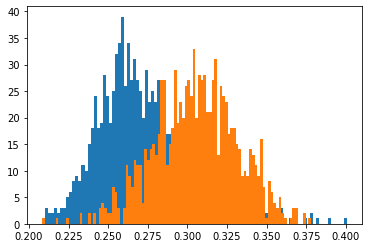

lossD 0.70 lossG 0.75:  48%|████▊     | 240/500 [05:28<05:55,  1.37s/it]

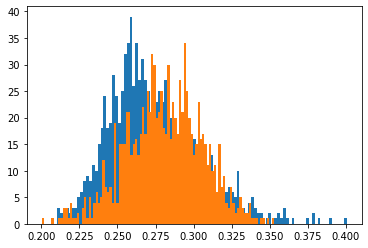

lossD 0.63 lossG 0.88:  52%|█████▏    | 260/500 [06:01<06:07,  1.53s/it]

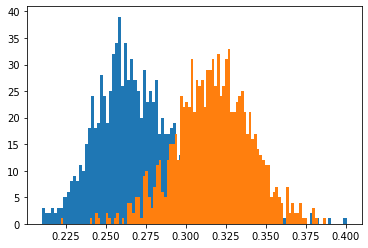

lossD 0.72 lossG 0.77:  56%|█████▌    | 280/500 [06:40<06:53,  1.88s/it]

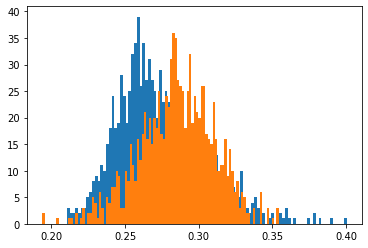

lossD 0.62 lossG 0.84:  60%|██████    | 300/500 [07:17<02:44,  1.22it/s]

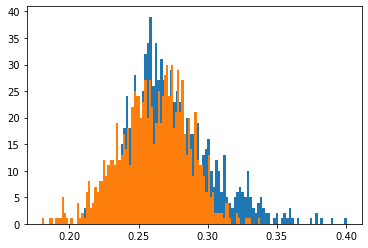

lossD 0.77 lossG 0.68:  64%|██████▍   | 320/500 [07:27<01:19,  2.25it/s]

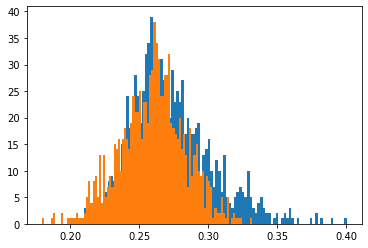

lossD 0.68 lossG 0.70:  68%|██████▊   | 340/500 [07:38<01:24,  1.89it/s]

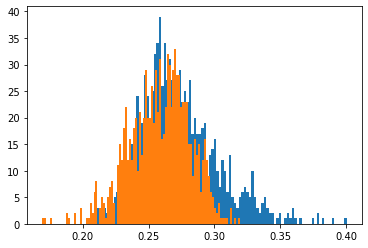

lossD 0.74 lossG 0.70:  72%|███████▏  | 360/500 [07:49<01:01,  2.29it/s]

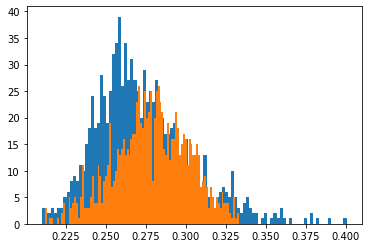

lossD 0.70 lossG 0.67:  76%|███████▌  | 380/500 [08:00<00:55,  2.15it/s]

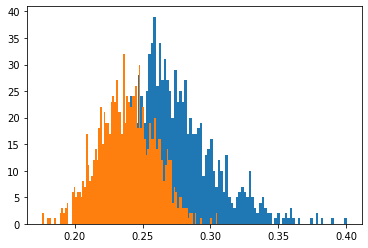

lossD 0.70 lossG 0.66:  80%|████████  | 400/500 [08:09<00:34,  2.94it/s]

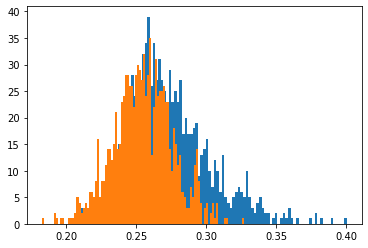

lossD 0.75 lossG 0.70:  84%|████████▍ | 420/500 [08:17<00:34,  2.34it/s]

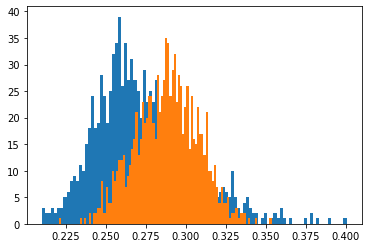

lossD 0.63 lossG 0.77:  88%|████████▊ | 440/500 [08:26<00:19,  3.10it/s]

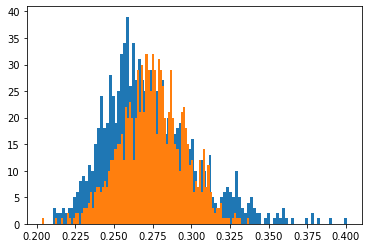

lossD 0.67 lossG 0.72:  92%|█████████▏| 460/500 [08:33<00:12,  3.20it/s]

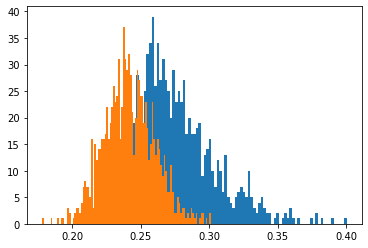

lossD 0.68 lossG 0.80:  96%|█████████▌| 480/500 [08:40<00:06,  3.30it/s]

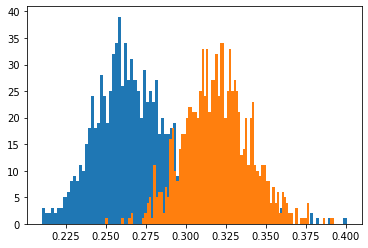

lossD 0.72 lossG 0.74: 100%|██████████| 500/500 [08:47<00:00,  1.06s/it]


In [142]:
# Vanilla GANs are incredibly sensitive to hyperparameters. 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 3e-4
z_dim = 64 #try 128,256
in_dimension = 367
BS = 32
disc = Discriminator(in_dimension).to(device)
gen = Generator(z_dim,in_dimension).to(device)
fixed_noise = torch.randn((BS,z_dim)).to(device)
#transforms = transforms.Compose(
#    [transforms.ToTensor() ,transforms.Normalize((mean,),(stdev,))])

optim_disc = optim.Adam(disc.parameters(),lr = lr)
optim_gen = optim.Adam(gen.parameters(),lr = lr)
criterion = nn.BCELoss()
#writer_fake = SummaryWriter(f"runs/GAN_bio/fake")
#writer_real = SummaryWriter(f"runs/GAN_bio/real")
step = 0
num_epochs = 300
t = trange(500)
lossesD, lossesG = [], []
for epoch in t:
    #batch
    permutation = torch.randperm(X_train.shape[0])
    lossD, lossG = 0,0
    for i in range(0,X_train.shape[0], BS):

        indices = permutation[i:i+BS]
        batch_x, batch_y = torch.from_numpy(X_train[indices]), torch.from_numpy(Y_train[indices])
        
        #train discriminator max - LOG(D(real)) + log(1-D(G(z))) opt when D(real)==1 and D(G(z))==0
        noise = torch.randn((batch_x.shape[0],z_dim)) #z_dim in the noise dimension
        fake = gen(noise)
        disc_real = disc(batch_x).view(-1)
        lossD_real = criterion(disc_real,torch.ones_like(disc_real)) #max LOG(D(real)) part of the loss
        disc_fake = disc(fake).view(-1)  
        lossD_fake = criterion(disc_fake,torch.zeros_like(disc_real))
        lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward(retain_graph=True) 
        optim_disc.step()
        
        #train generator min log (1-D(G(z))) opt when D(G(z))==1 ----> max log(D(G(z)))
        output = disc(fake).view(-1)
        #we use ones because of the structure of BCELoss ylog(D(G(z))) + (1-y)log(1-D(G(z)))
        lossG = criterion(output, torch.ones_like(output)) 
        gen.zero_grad()
        lossG.backward()
        optim_gen.step()
        t.set_description("lossD %.2f lossG %.2f" %(lossD,lossG))
    
    lossesD.append(lossD)
    lossesG.append(lossG)  
    if epoch % 20 == 0:
            noise = torch.randn((1000,z_dim)) #z_dim in the noise dimension
            fake = gen(noise)
            plt.hist(np.mean(X_train,axis=1), bins=100)[0][0]
            plt.hist(torch.mean(fake,dim=1).detach().numpy(), bins = 100)
            plt.show(step)
            step = step + 1

        #print(f"Epoch [{epoch}/{num_epochs}] Loss D {lossD:.4f}, Loss G: {lossG:.4f}")

1.0

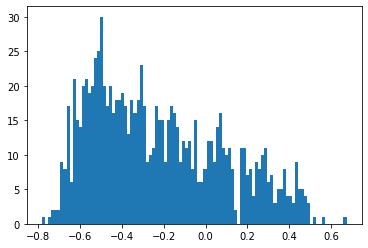

In [128]:
#task di oggi 
noise = torch.randn((1000,z_dim)) #z_dim in the noise dimension
fake = gen(noise)
generated = torch.mean(fake,dim=1).detach().numpy()
plt.hist(generated, bins=100)[0][0]

In [98]:
skew(generated)

0.7889418601989746

3.0

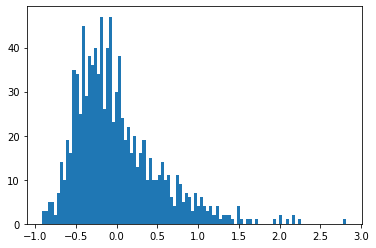

In [130]:
plt.hist(np.mean(X_train,axis=1), bins=100)[0][0]


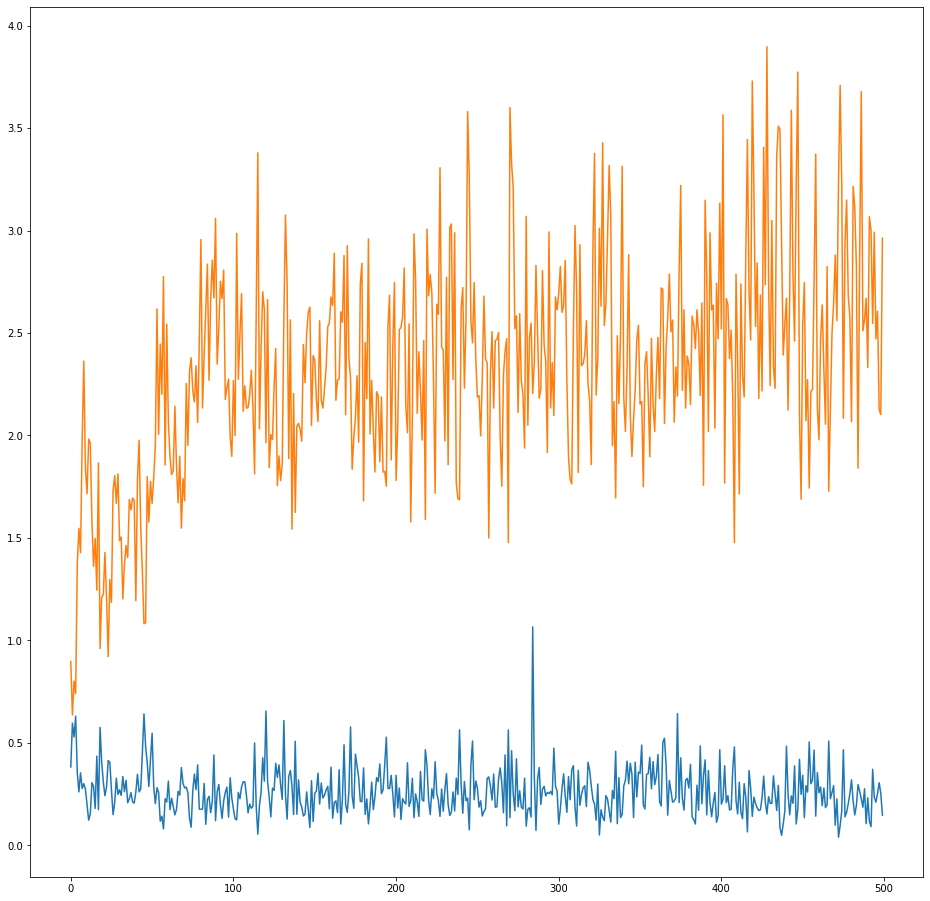

In [131]:
plt.figure(figsize=(16,16))
plt.plot(lossesD)
plt.plot(lossesG)